In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import os

### Plot KL divergence

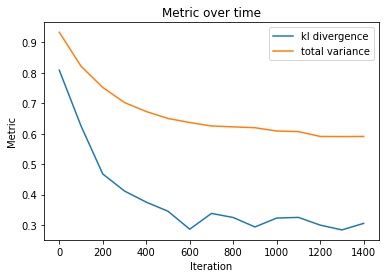

In [136]:
# data = np.load('./results/lsd_wrapper_grathwohlsample/moons/LSD_ckpt_3999.npz', allow_pickle=True)

foldername = './results/final_results_for_writeup/hmc_rings_eps.3_15iter_K100_gaus'
data = np.load(f"{foldername}/final_res.npy.npz",
                   allow_pickle=True)
list(data)
metrics = data['metrics']
metrics = metrics[np.newaxis][0]

freq = 100
niter = np.shape(metrics['kldiv'])[0]

x = np.arange(0, freq*niter, freq)
fig = plt.figure()
plt.plot(x, metrics['kldiv'], label='kl divergence')
plt.plot(x, metrics['tv'], label='total variance')
plt.xlabel("Iteration")
# plt.ylabel("KL divergence")
plt.ylabel("Metric")
# plt.title("KL divergence over time")
plt.title("Metric over time")
plt.legend()

fig.savefig(f"{foldername}/metrics_over_time.png")

plt.show()

### Generate gif

In [77]:
# HMC sampling outputs, to make sure they are sorted correctly.
def key_func(x):
  val = os.path.basename(x).split('_')[-1].split('.')[0]
  # Really large number so it for sure is the last one.
  if val == 'final': return 1000000
  # Ditto but small.
  if val == 'initial': return -1
  return int(val)

In [70]:
#https://www.blog.pythonlibrary.org/2021/06/23/creating-an-animated-gif-with-python/
import glob
from PIL import Image
def make_gif(frame_folder, key_func=None, debug_mode=False):
    if debug_mode:
      for e in sorted(glob.glob(f"{frame_folder}/*.png"), key=key_func):
        print(e)
    frames = [Image.open(image) for image in sorted(glob.glob(f"{frame_folder}/*.png"), key=key_func)]
    frame_one = frames[0]
    frame_one.save(f"{frame_folder}/animation.gif", format="GIF", append_images=frames,
               save_all=True, duration=500, loop=0)

In [137]:
# make_gif("./results/lsd_wrapper_grathwohlsample/checkerboard/figs/")
make_gif(f"{foldername}/snapshot_ims/", key_func)